<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%94%D0%97_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [3]:
df = df.drop('ID', axis = 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [7]:
kmeans.inertia_

513.9660320259301

In [8]:
import matplotlib.pyplot as plt

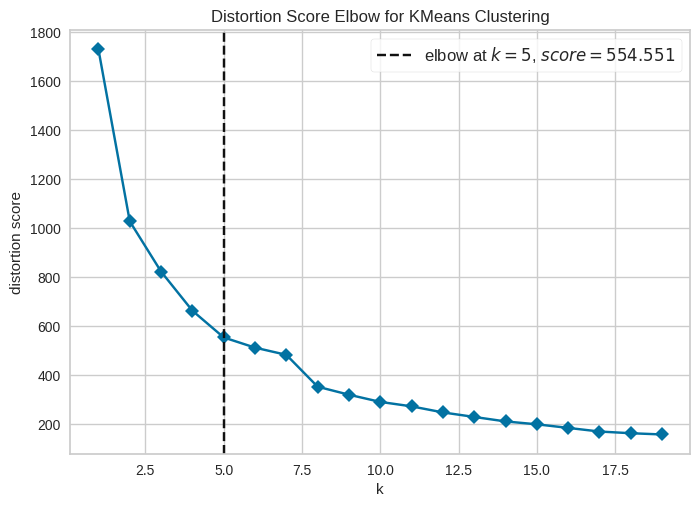

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion',
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


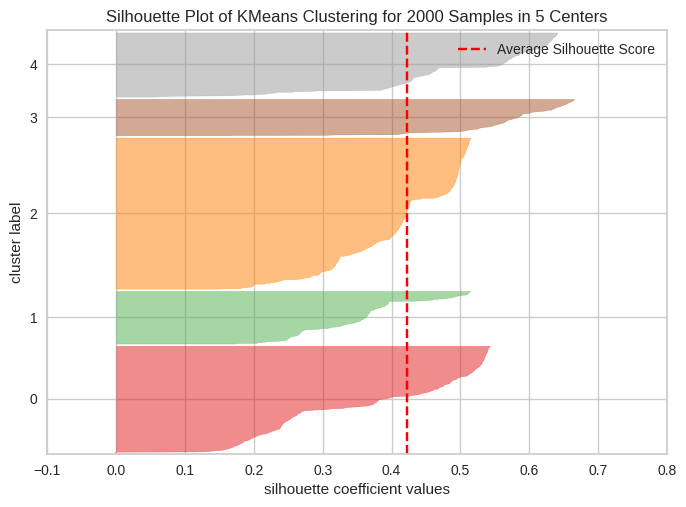

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(5))
visualizer.fit(data)
visualizer.show()

In [12]:
kmeans = KMeans(5)

kmeans.fit(data)

df['cluster_id'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [13]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,736
1,516
3,313
4,257
2,178


In [15]:
results = df.groupby(by='cluster_id').mean()

results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
0,1.0,1.0,33.192935,1.262228,116442.165761,0.741848,0.569293
1,0.0,0.0,40.007752,0.821705,145325.602713,1.265504,1.532946
2,1.0,0.0,35.146067,0.932584,97997.241573,0.370787,0.073034
3,0.0,0.0,37.565495,0.738019,102782.319489,0.370607,0.060703
4,0.0,1.0,33.968872,1.268482,122976.723735,0.933852,0.918288


<Axes: xlabel='cluster_id'>

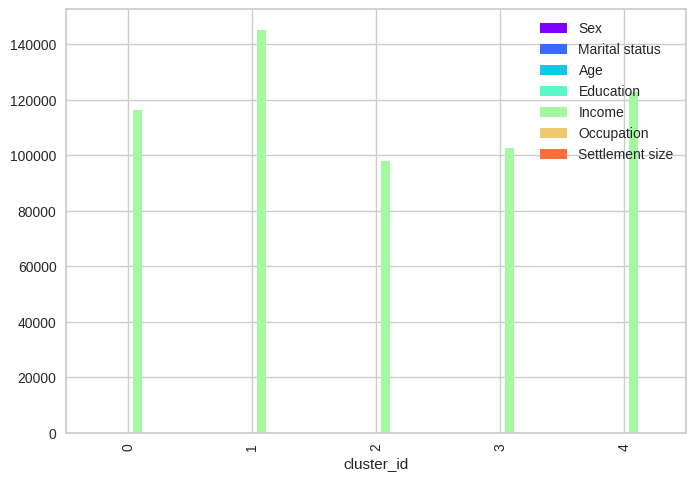

In [16]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

<Axes: xlabel='cluster_id'>

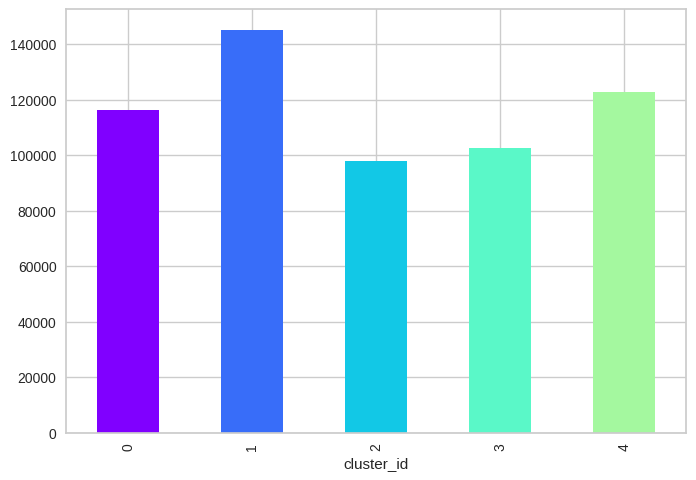

In [17]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))
income = results['Income']
income.plot(kind='bar', color=color)

<Axes: xlabel='cluster_id'>

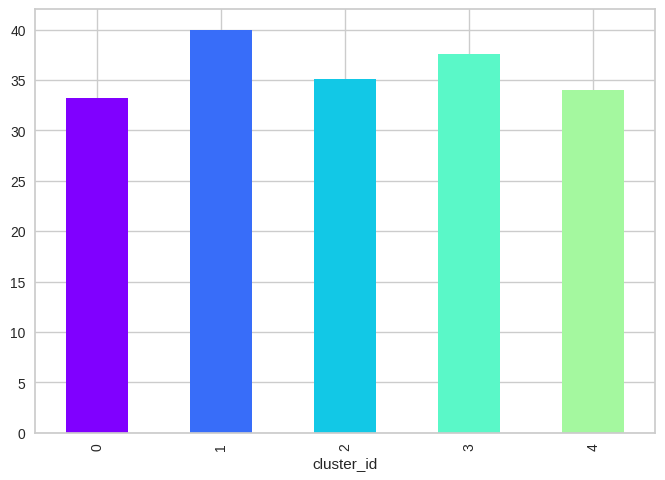

In [18]:
age = results['Age']
age.plot(kind='bar', color=color)

<Axes: xlabel='cluster_id'>

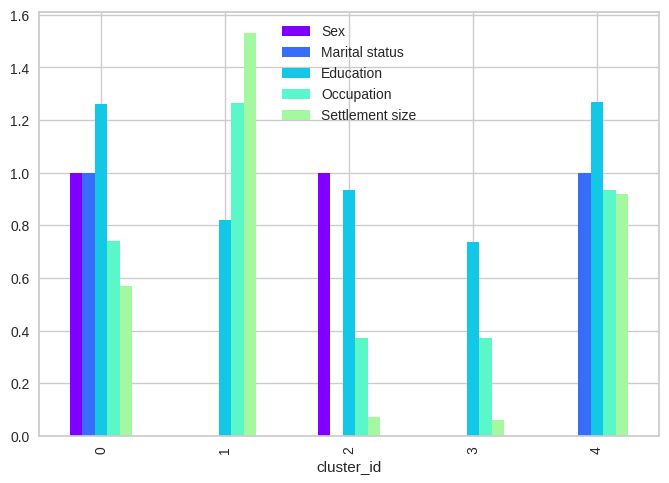

In [19]:
results = results.drop(columns = ['Income','Age'])
results.plot(kind='bar', color=color)